In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
def give_quarter_performance(Predictions,Labels,quarter):
    '''
    
    Arguments:
    
    Predictions - A dataframe containing the predictions of each stock for the upcoming quarters (8)
    Labels - A dataframe containing the labels of each stock for the upcoming 8 quarters
    quarter - the required quarter to calculate performance
    
    
    Returns:
    
    A dataframe containing the predictions and labels for the top 30 stocks in that quarter
    
    '''
    quarter = str(quarter)
    Q = Predictions[quarter]
    Q_labels = Labels[quarter]
    Q = Q.sort_values(ascending=False)
    Q_top_30 = Q[:30]
    
    top_30_labels = []

    for index in Q_top_30.index:
        row = Q_labels.loc[index]
        top_30_labels.append(row)
    
    labels_series = pd.Series(top_30_labels)
    final_df = pd.DataFrame({'Preds': Q_top_30.values,'Labels': labels_series.values},index=Q_top_30.index)
    
    return final_df

def quarter_performance(Quarter_result):
    '''
    
    Calculates the Portfolio value for the quarter
    
    Returns- Portfolio performance for the quarter
    
    '''
    portfolio_start = 30
    portfolio_end = 0
    for value in Quarter_result['Labels'].values:
        portfolio_end = portfolio_end + 1 + value
    
    perfomance = ((portfolio_end-portfolio_start)/portfolio_start)*100
    return perfomance

def draw_performance_graphs(model,q_pers,q_turnouts):
    positives = []
    for q_per in q_pers:
        if q_per >0:
            positives.append(True)
        else:
            positives.append(False)
            
    positives = pd.Series(positives)
    
    fig = plt.figure(figsize=(15,4))
    title = fig.suptitle('Portfolio Performance of '+str(model)+' model')

    ax1 = fig.add_subplot(1,2,1)
    ax1.bar(np.arange(1,len(q_pers)+1),q_pers,color=positives.map({True: 'g', False: 'r'}),width = 0.5)
    ax1.axhline(0,color='black')
    ax1.set_ylabel('Percentage Returns across Quarters')
    ax1.set_xlabel('Quarters')


    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(np.arange(1,len(q_turnouts)+1),q_turnouts,label = 'Portolio Value',color = 'green')
    ax2.set_xlabel('Quarters')
    ax2.set_ylabel('Portfolio Value for 100$ Invested')
    plt.show()
        
def total_performance(num_quarters,Predictions,labels_df, model):
    total_returns = 100
    q_turnouts = [100]
    q_pers = []
    for quarter in range(num_quarters):
        Q_result = give_quarter_performance(Predictions,labels_df,quarter)
        Q_per = quarter_performance(Q_result)
        
        total_returns = total_returns * (1+(Q_per/100))
        print('Quarter '+str(quarter+1)+' Result :' +str("%.2f" % Q_per)+' %')
        q_turnouts.append(total_returns)
        q_pers.append(Q_per)
    
    compounded_result = total_returns-100
    q_avg_return = (pow(total_returns/100, 1/num_quarters) - 1) * 100
    CAGR = (pow(total_returns/100, 1/(num_quarters/4)) - 1) * 100
    
    print('Compounded Result :'+str("%.2f" % compounded_result)+str(' %'))
    print('Quarterly Compounded Growth Rate :',"%.2f" % q_avg_return, '%')
    print('CAGR :',"%.2f" %  CAGR, '%')
    print('Sharpe Ratio :',"%.2f" %  ((4**0.5) * q_avg_return/np.std(q_pers)))    
    
    
    draw_performance_graphs(model,q_pers,q_turnouts)
    
    return compounded_result

Quarter 1 Result :8.76 %
Quarter 2 Result :8.70 %
Quarter 3 Result :4.43 %
Quarter 4 Result :1.79 %
Quarter 5 Result :5.20 %
Quarter 6 Result :-4.15 %
Quarter 7 Result :-0.03 %
Quarter 8 Result :10.30 %
Compounded Result :39.73 %
Quarterly Compounded Growth Rate : 4.27 %
CAGR : 18.21 %
Sharpe Ratio : 1.84


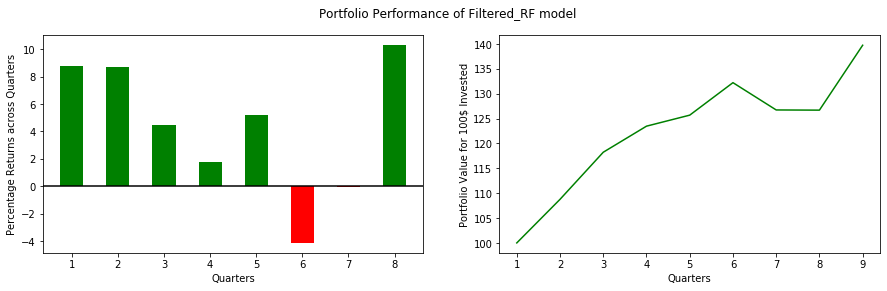

Quarter 1 Result :8.88 %
Quarter 2 Result :7.61 %
Quarter 3 Result :5.60 %
Quarter 4 Result :4.93 %
Quarter 5 Result :5.68 %
Quarter 6 Result :-2.77 %
Quarter 7 Result :0.94 %
Quarter 8 Result :9.07 %
Compounded Result :46.88 %
Quarterly Compounded Growth Rate : 4.92 %
CAGR : 21.19 %
Sharpe Ratio : 2.58


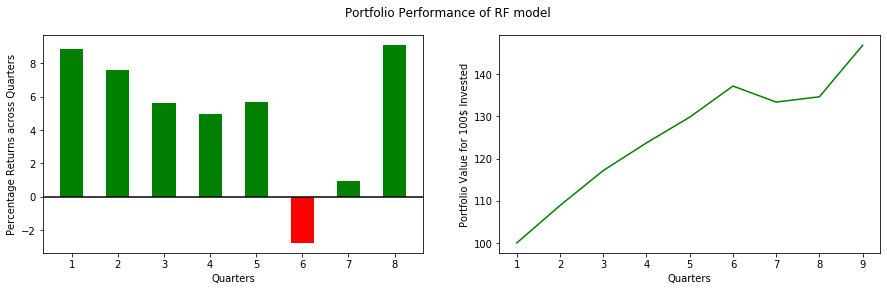

Quarter 1 Result :7.77 %
Quarter 2 Result :6.01 %
Quarter 3 Result :4.99 %
Quarter 4 Result :3.81 %
Quarter 5 Result :8.55 %
Quarter 6 Result :-6.78 %
Quarter 7 Result :-2.48 %
Quarter 8 Result :11.03 %
Compounded Result :36.42 %
Quarterly Compounded Growth Rate : 3.96 %
CAGR : 16.80 %
Sharpe Ratio : 1.42


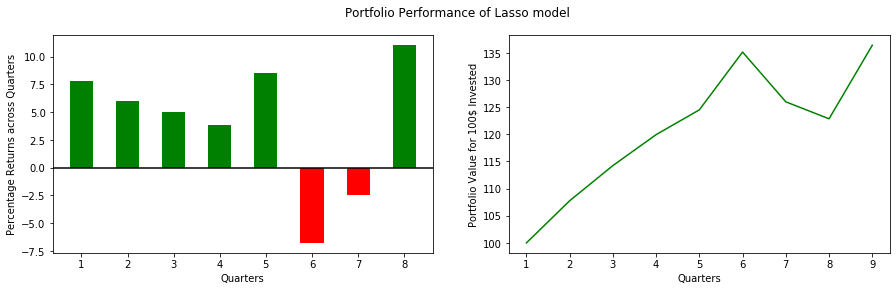

Quarter 1 Result :7.60 %
Quarter 2 Result :8.37 %
Quarter 3 Result :4.73 %
Quarter 4 Result :1.69 %
Quarter 5 Result :5.78 %
Quarter 6 Result :-5.04 %
Quarter 7 Result :-2.80 %
Quarter 8 Result :8.34 %
Compounded Result :31.38 %
Quarterly Compounded Growth Rate : 3.47 %
CAGR : 14.62 %
Sharpe Ratio : 1.44


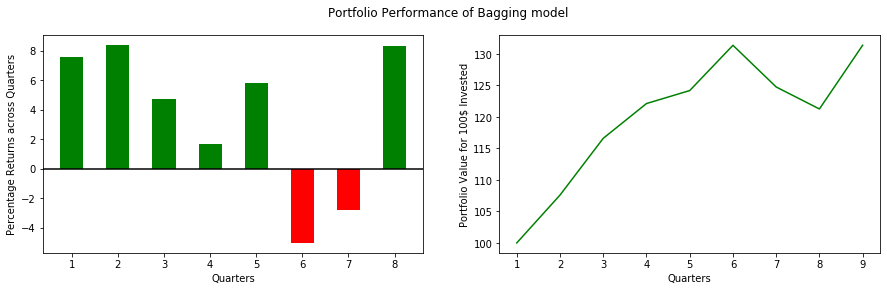

Quarter 1 Result :7.56 %
Quarter 2 Result :6.07 %
Quarter 3 Result :6.40 %
Quarter 4 Result :1.59 %
Quarter 5 Result :6.65 %
Quarter 6 Result :-5.83 %
Quarter 7 Result :-3.52 %
Quarter 8 Result :7.58 %
Compounded Result :28.57 %
Quarterly Compounded Growth Rate : 3.19 %
CAGR : 13.39 %
Sharpe Ratio : 1.28


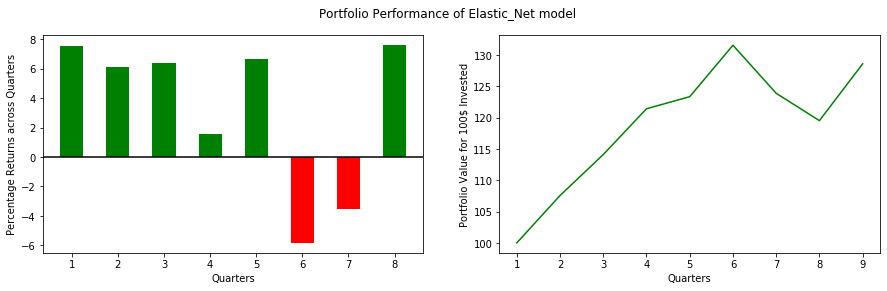

Quarter 1 Result :6.43 %
Quarter 2 Result :5.55 %
Quarter 3 Result :2.56 %
Quarter 4 Result :5.98 %
Quarter 5 Result :3.13 %
Quarter 6 Result :-8.84 %
Quarter 7 Result :-1.77 %
Quarter 8 Result :7.72 %
Compounded Result :21.47 %
Quarterly Compounded Growth Rate : 2.46 %
CAGR : 10.22 %
Sharpe Ratio : 0.96


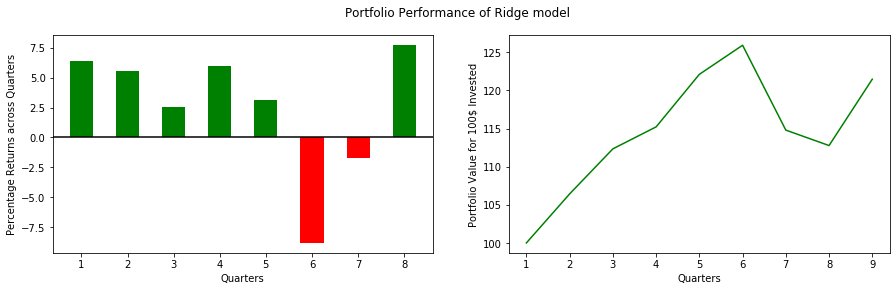

Quarter 1 Result :7.79 %
Quarter 2 Result :3.14 %
Quarter 3 Result :3.08 %
Quarter 4 Result :-2.02 %
Quarter 5 Result :3.26 %
Quarter 6 Result :-7.49 %
Quarter 7 Result :-1.98 %
Quarter 8 Result :8.46 %
Compounded Result :14.03 %
Quarterly Compounded Growth Rate : 1.65 %
CAGR : 6.78 %
Sharpe Ratio : 0.66


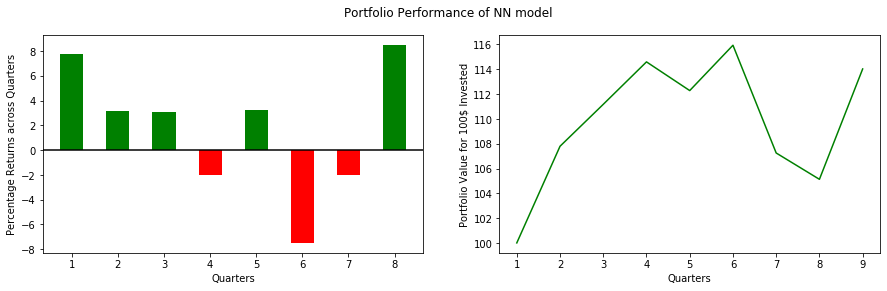

In [26]:
Models = ['Filtered_RF','RF','Lasso','Bagging','Elastic_Net','Ridge','NN']
Agg_Models = ['Lasso','RF','Bagging','Elastic_Net']
Labels = pd.read_csv('./All_Data/Labels_and_Preds/Labels.csv',delimiter =',',index_col = 'Unnamed: 0')
Model_Results = []

for model in Models:
    Preds = pd.read_csv('./All_Data/Labels_and_Preds/Predictions_'+model+'.csv', delimiter = ',', index_col = 'Unnamed: 0')
    Model_Results.append(total_performance(8,Preds,Labels,model))

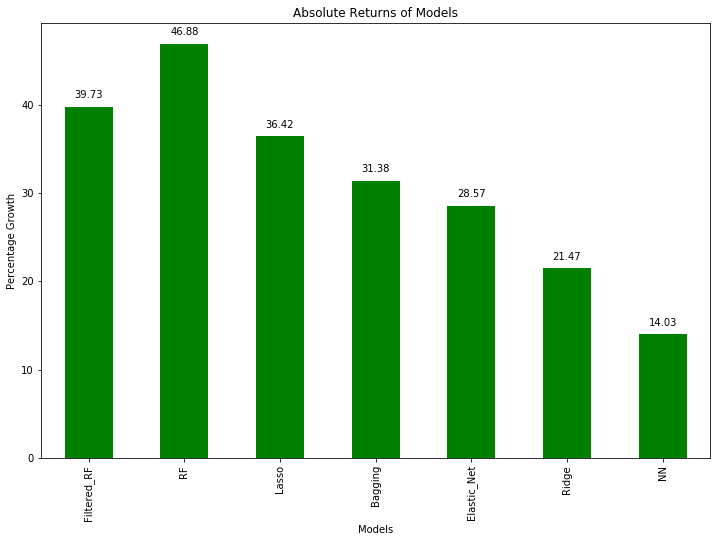

In [4]:
Model_Results = pd.Series(Model_Results)

plt.figure(figsize=(12, 8))
ax = Model_Results.plot(kind='bar', color = 'green')
ax.set_title('Absolute Returns of Models')
ax.set_xlabel('Models')
ax.set_ylabel('Percentage Growth')
ax.set_xticklabels(Models)

rects = ax.patches

# Make some labels.
labels = ["%.2f" % val for val in Model_Results.values]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.75, label,
            ha='center', va='bottom')



# Aggregation

In [5]:
def aggregate(Models,num_quarters):
    model_dfs = []
    for model in Models:
        Preds = pd.read_csv('./All_Data/Labels_and_Preds/Predictions_'+model+'.csv', delimiter = ',', index_col = 'Unnamed: 0')
        model_df = pd.DataFrame()
        for quarter in range(num_quarters):
            Q_portfolio = give_quarter_performance(Preds,Labels,quarter)
            temp_df = pd.DataFrame(Q_portfolio.index)
            model_df = pd.concat([model_df,temp_df], ignore_index= True, axis =1)

        model_dfs.append(model_df)
        
    return model_dfs

In [8]:
Agg_Models = ['Lasso','RF','Filtered_RF']
Q = aggregate(Agg_Models,8)

In [9]:
'''
0: Lasso
1: NN
2: RF
3: Elastic Net
4: Bagging
5: Ridge
'''

'\n0: Lasso\n1: NN\n2: RF\n3: Elastic Net\n4: Bagging\n5: Ridge\n'

In [10]:
import operator
import itertools

def bootstrap_aggregate(model_outputs):
    Overall_aggregate = []
    num_quarters = model_outputs[0].shape[1]
    for i in range(num_quarters):
        Quarter_aggregate = {}
        for j in range(len(model_outputs)):
            model_portfolio = model_outputs[j][i].values
            for value in model_portfolio:
                value = str(value)
                if value in Quarter_aggregate:
                    Quarter_aggregate[value]+=1
                else:
                    Quarter_aggregate[value] = 1
                    
        Quarter_aggregate_sorted = dict( sorted(Quarter_aggregate.items(), key=operator.itemgetter(1),reverse=True))
        Quarter_aggregate_top_30 = dict(itertools.islice(Quarter_aggregate_sorted.items(), 30))
        Quarter_aggregate_df = pd.DataFrame(list(Quarter_aggregate_top_30.items()))
        Overall_aggregate.append(Quarter_aggregate_df)

    return Overall_aggregate


In [11]:
Overall_bootstrap_agg = bootstrap_aggregate(Q)

In [12]:
def aggregated_performance_top_30(Overall_bootstrap,Labels):
    num_quarters = len(Overall_bootstrap)
    
    total_returns = 100
    q_pers = []
    q_turnouts = []
    for quarter in range(num_quarters):
        assets = Overall_bootstrap[quarter][0].values
        q_performance = 0
        asset_labels = Labels[str(quarter)]
        
        for asset in assets:
            asset_performance = asset_labels.loc[(asset)] 
            q_performance = q_performance + 1 + asset_performance
            q_per = ((q_performance-30)/30)*100
        
        total_returns = total_returns * (1+(q_per/100))
        
        print('Quarter '+str(quarter+1)+' Result :' +str("%.2f" % q_per)+' %')
        q_pers.append(q_per)
        q_turnouts.append(total_returns)
    
    compounded_result = total_returns-100
    q_avg_return = (pow(total_returns/100, 1/num_quarters) - 1) * 100
    CAGR = (pow(total_returns/100, 1/(num_quarters/4)) - 1) * 100
    
    print('Compounded Result :'+str("%.2f" % compounded_result)+str(' %'))
    print('Quarterly Compounded Growth Rate :',"%.2f" % q_avg_return, '%')
    print('CAGR :',"%.2f" %  CAGR, '%')
    print('Sharpe Ratio :',"%.2f" % (4**0.5 * (q_avg_return/np.std(q_pers))))  
    
    positives = []
    for q_per in q_pers:
        if q_per >0:
            positives.append(True)
        else:
            positives.append(False)
            
    positives = pd.Series(positives)
    
    fig = plt.figure(figsize=(15,4))
    title = fig.suptitle('Portfolio Performance of Aggregated model')
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.bar(np.arange(1,len(q_pers)+1),q_pers,color=positives.map({True: 'g', False: 'r'}),width = 0.5)
    ax1.axhline(0,color='black')
    ax1.set_ylabel('Percentage Returns across Quarters')
    ax1.set_xlabel('Quarters')
    
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(np.arange(1,len(q_turnouts)+1),q_turnouts,label = 'Portolio Value',color = 'green')
    ax2.set_xlabel('Quarters')
    ax2.set_ylabel('Portfolio Value for 100$ Invested')
    plt.show() 

Quarter 1 Result :8.92 %
Quarter 2 Result :7.97 %
Quarter 3 Result :5.25 %
Quarter 4 Result :5.65 %
Quarter 5 Result :5.83 %
Quarter 6 Result :-3.04 %
Quarter 7 Result :-0.77 %
Quarter 8 Result :9.68 %
Compounded Result :46.05 %
Quarterly Compounded Growth Rate : 4.85 %
CAGR : 20.85 %
Sharpe Ratio : 2.28


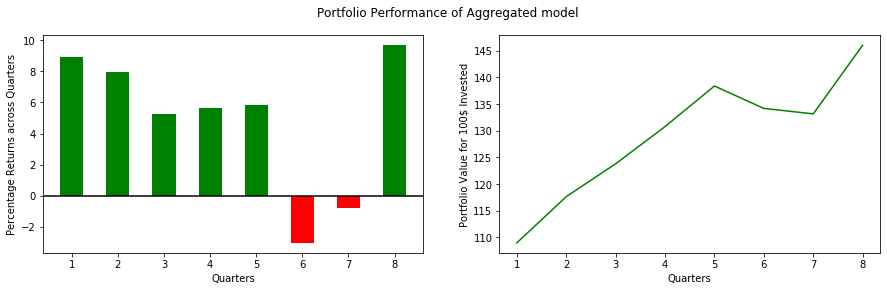

In [13]:
aggregated_performance_top_30(Overall_bootstrap_agg,Labels)

# Portfolio Size optimization

<ln>Here all the models are iterated over the testing period of 8 quarters </ln>
<ln>We iterate from 5-100 the portfolio size and then pick the optimal size </ln>
<ln>according to the sharpe ratio. These charts will be useful in assessing the </ln>
<ln>underlying trends within the models

In [19]:
def give_variable_portfolio_size_performance(Predictions,Labels,quarter,X):
    quarter = str(quarter)
    Q = Predictions[quarter]
    Q_labels = Labels[quarter]
    Q = Q.sort_values(ascending=False)
    Q_top_X = Q[:X]
    
    top_X_labels = []

    for index in Q_top_X.index:
        row = Q_labels.loc[index]
        top_X_labels.append(row)
    
    labels_series = pd.Series(top_X_labels)
    final_df = pd.DataFrame({'Preds': Q_top_X.values,'Labels': labels_series.values}
                            ,index=Q_top_X.index)
    
    return final_df

def quarter_performance_X(Quarter_result,Portfolio_size):    
    portfolio_start = int(Portfolio_size)
    portfolio_end = 0
    for value in Quarter_result['Labels'].values:
        portfolio_end = portfolio_end + 1 + value
    
    perfomance = ((portfolio_end-portfolio_start)/portfolio_start)*100
    return perfomance
        
def total_performance_of_size_X(num_quarters,Predictions,labels_df, model, X):
    total_returns = 100
    q_turnouts = [100]
    q_pers = []
    for quarter in range(num_quarters):
        Q_result = give_variable_portfolio_size_performance(Predictions,labels_df,quarter,X)
        Q_per = quarter_performance_X(Q_result,X)
        
        total_returns = total_returns * (1+(Q_per/100))
        #print('Quarter '+str(quarter+1)+' Result :' +str("%.2f" % Q_per)+' %')
        q_turnouts.append(total_returns)
        q_pers.append(Q_per)
    
    compounded_result = total_returns-100
    q_avg_return = (pow(total_returns/100, 1/num_quarters) - 1) * 100
    CAGR = (pow(total_returns/100, 1/(num_quarters/4)) - 1) * 100
    Sharpe = ((4**0.5) * q_avg_return/np.std(q_pers))
    
#     print('Compounded Result :'+str("%.2f" % compounded_result)+str(' %'))
#     print('Quarterly Compounded Growth Rate :',"%.2f" % q_avg_return, '%')
#     print('CAGR :',"%.2f" %  CAGR, '%')
#     print('Sharpe Ratio :',"%.2f" %  ((4**0.5) * q_avg_return/np.std(q_pers))) 
#     print('\n')
    
    return compounded_result,CAGR,Sharpe

def get_best_portfolio_size(num_quarters,Predictions,Labels,model,start_size,end_size):
    Results = []
    CAGRs = []
    Sharpes = []
    for i in range(start_size,end_size):
        Result,CAGR,Sharpe = total_performance_of_size_X(8,Preds,Labels,model,i)
        Results.append(Result)
        CAGRs.append(CAGR)
        Sharpes.append(Sharpe)
        
    fig = plt.figure(figsize=(18,4))
    title = fig.suptitle('Portfolio Performance of '+str(model)+' model of Varying Sizes')

    ax1 = fig.add_subplot(1,3,1)
    ax1.plot(np.arange(start_size,end_size),Results,color='Blue',label = 'Returns')
    ax1.set_ylabel('Returns across Various Portfolio Sizes')
    ax1.set_xlabel('Size')


    ax2 = fig.add_subplot(1,3,2)
    ax2.plot(np.arange(start_size,end_size),CAGRs,label = 'CAGRs',color = 'green')
    ax2.set_xlabel('Size')
    ax2.set_ylabel('CAGRs across Various Portfolio Sizes')
    
    ax3 = fig.add_subplot(1,3,3)
    ax3.plot(np.arange(start_size,end_size),Sharpes,label = 'Sharpe Ratios',color = 'Red')
    ax3.set_xlabel('Size')
    ax3.set_ylabel('Sharpe Ratios across Various Portfolio Sizes')
    plt.show()
        
    optimal_size = np.argmax(Sharpes)
    
    print('Optimal Porfolio Size for ', model,' model')
    print('Size :',start_size+optimal_size)
    print('Compounded Result: ',Results[optimal_size])
    print('CAGR :' ,CAGRs[optimal_size])
    print('Sharpe Ratio :' ,Sharpes[optimal_size])
    

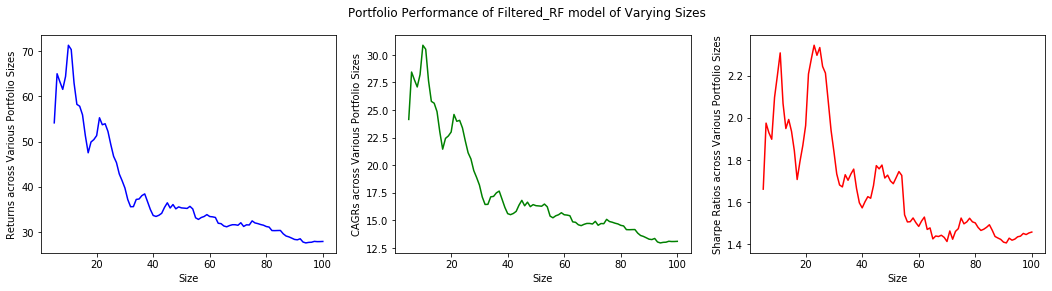

Optimal Porfolio Size for  Filtered_RF  model
Size : 23
Compounded Result:  53.92995770431267
CAGR : 24.068512405167763
Sharpe Ratio : 2.3455943041964153


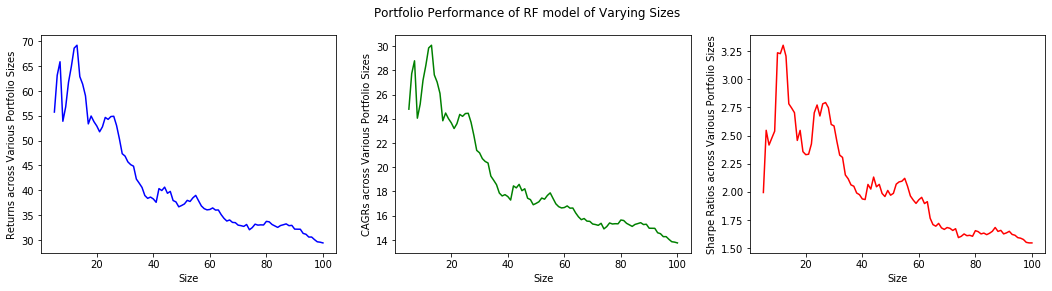

Optimal Porfolio Size for  RF  model
Size : 12
Compounded Result:  68.61684523116969
CAGR : 29.85254915910187
Sharpe Ratio : 3.3015286856917743


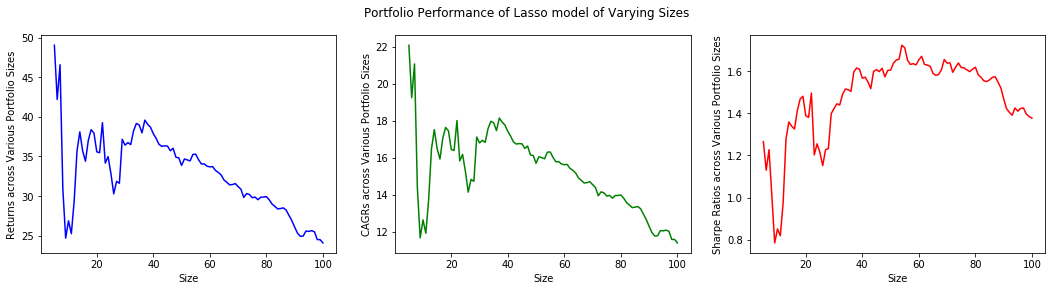

Optimal Porfolio Size for  Lasso  model
Size : 54
Compounded Result:  35.24732447044315
CAGR : 16.295883190439355
Sharpe Ratio : 1.722342580019502


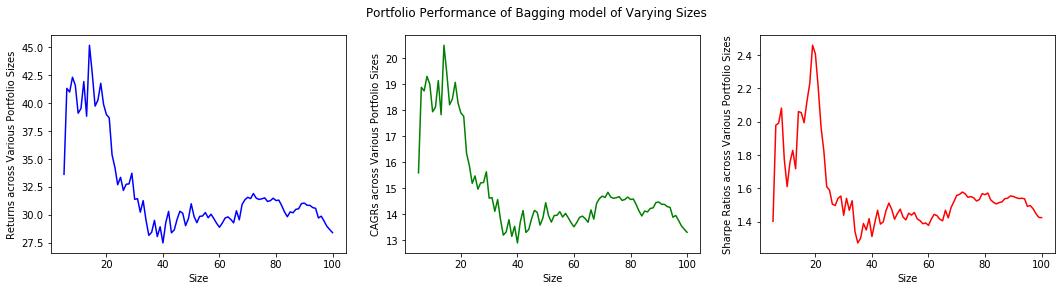

Optimal Porfolio Size for  Bagging  model
Size : 19
Compounded Result:  39.88619696250257
CAGR : 18.273495324397416
Sharpe Ratio : 2.4590138030095297


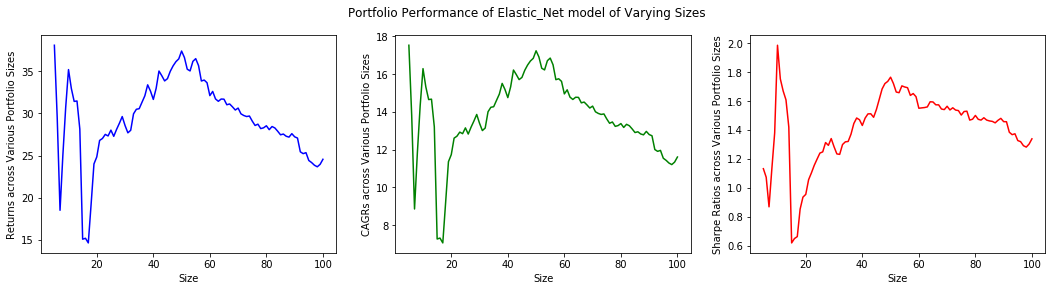

Optimal Porfolio Size for  Elastic_Net  model
Size : 10
Compounded Result:  35.219668812085786
CAGR : 16.283992368720202
Sharpe Ratio : 1.9843882694032067


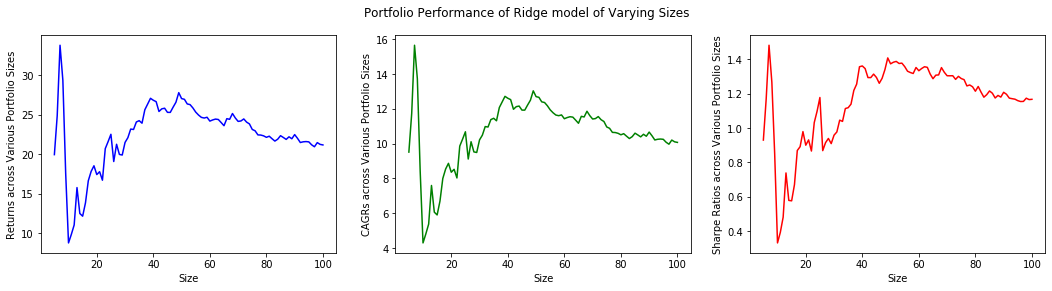

Optimal Porfolio Size for  Ridge  model
Size : 7
Compounded Result:  33.74994856122811
CAGR : 15.650312823281244
Sharpe Ratio : 1.4822172187541356


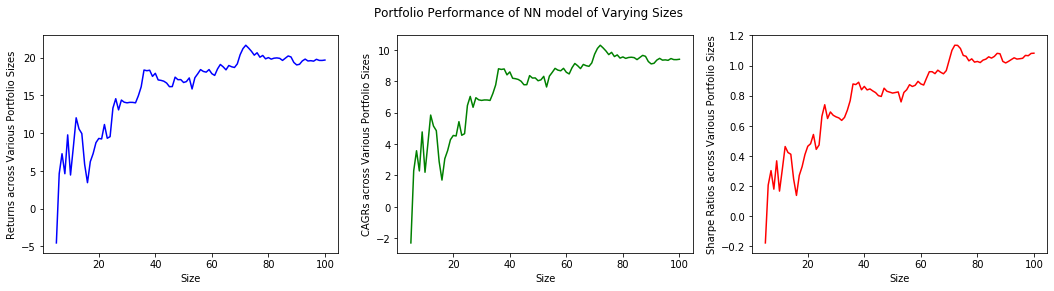

Optimal Porfolio Size for  NN  model
Size : 72
Compounded Result:  21.656804713898737
CAGR : 10.298143553687588
Sharpe Ratio : 1.1350868659091835


In [15]:

for model in Models:
    Preds = pd.read_csv('./All_Data/Labels_and_Preds/Predictions_'+model+'.csv', delimiter = ',', index_col = 'Unnamed: 0')
    Labels = pd.read_csv('./All_Data/Labels_and_Preds/Labels.csv',delimiter =',',index_col = 'Unnamed: 0')
    #Var_Model_Results.append(total_performance_of_size_X(8,Preds,Labels,model,30))
    get_best_portfolio_size(8,Preds,Labels,model,5,101)

## Future Work
1. Filter Predictions based on model accuracy/performance
2. Work on Non-Compounded portfolio
3. Efficient Frontier

# Feature Selection

Quarter 1 Result :6.34 %
Quarter 2 Result :7.10 %
Quarter 3 Result :4.99 %
Quarter 4 Result :2.38 %
Quarter 5 Result :5.77 %
Quarter 6 Result :-2.54 %
Quarter 7 Result :0.61 %
Quarter 8 Result :9.39 %
Compounded Result :38.88 %
Quarterly Compounded Growth Rate : 4.19 %
CAGR : 17.85 %
Sharpe Ratio : 2.32


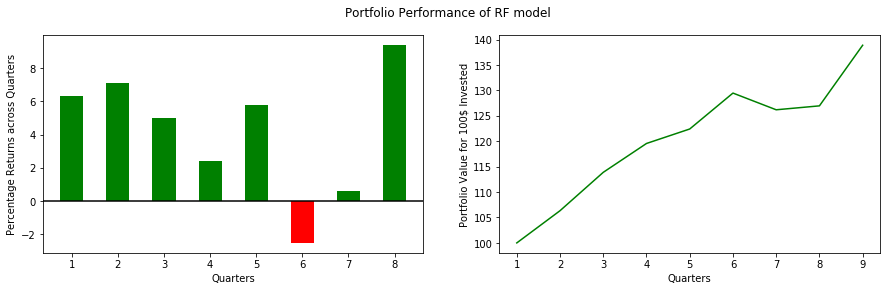

Quarter 1 Result :6.89 %
Quarter 2 Result :6.47 %
Quarter 3 Result :5.08 %
Quarter 4 Result :2.35 %
Quarter 5 Result :8.44 %
Quarter 6 Result :-6.69 %
Quarter 7 Result :-2.75 %
Quarter 8 Result :8.85 %
Compounded Result :31.10 %
Quarterly Compounded Growth Rate : 3.44 %
CAGR : 14.50 %
Sharpe Ratio : 1.31


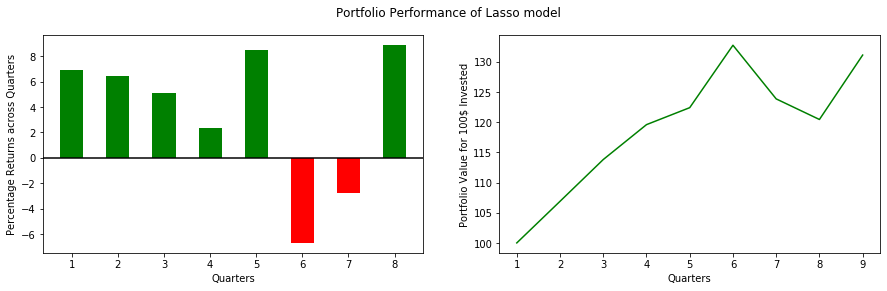

Quarter 1 Result :6.48 %
Quarter 2 Result :9.71 %
Quarter 3 Result :5.47 %
Quarter 4 Result :1.74 %
Quarter 5 Result :5.06 %
Quarter 6 Result :-5.41 %
Quarter 7 Result :-2.96 %
Quarter 8 Result :8.18 %
Compounded Result :30.77 %
Quarterly Compounded Growth Rate : 3.41 %
CAGR : 14.35 %
Sharpe Ratio : 1.36


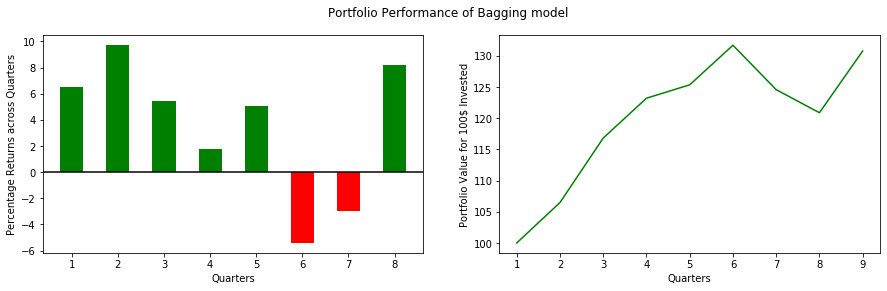

Quarter 1 Result :6.85 %
Quarter 2 Result :5.04 %
Quarter 3 Result :5.83 %
Quarter 4 Result :0.56 %
Quarter 5 Result :6.31 %
Quarter 6 Result :-5.51 %
Quarter 7 Result :-2.95 %
Quarter 8 Result :7.22 %
Compounded Result :24.85 %
Quarterly Compounded Growth Rate : 2.81 %
CAGR : 11.74 %
Sharpe Ratio : 1.22


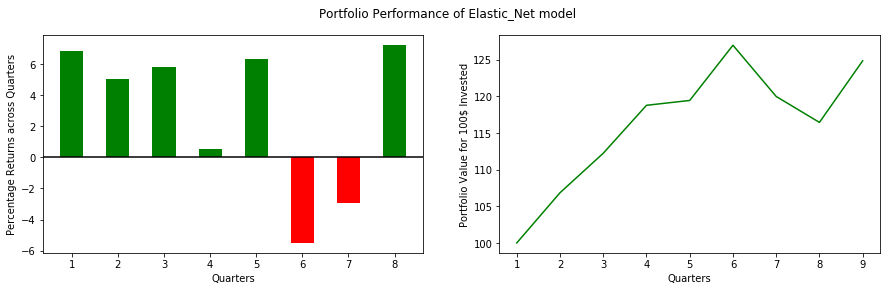

Quarter 1 Result :5.58 %
Quarter 2 Result :5.58 %
Quarter 3 Result :2.81 %
Quarter 4 Result :2.09 %
Quarter 5 Result :5.11 %
Quarter 6 Result :-7.56 %
Quarter 7 Result :-1.53 %
Quarter 8 Result :7.86 %
Compounded Result :20.74 %
Quarterly Compounded Growth Rate : 2.38 %
CAGR : 9.88 %
Sharpe Ratio : 1.03


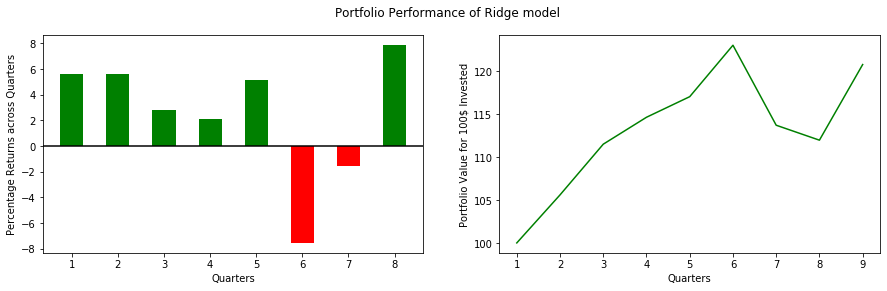

In [24]:
f_Models = ['RF','Lasso','Bagging','Elastic_Net','Ridge']
#Agg_Models = ['Lasso','RF','Bagging','Elastic_Net']
Labels = pd.read_csv('./All_Data/Labels_and_Preds/Labels.csv',delimiter =',',index_col = 'Unnamed: 0')
f_Model_Results = []

for model in f_Models:
    Preds = pd.read_csv('./All_Data/Labels_and_Preds/f_Predictions_'+model+'.csv', delimiter = ',', index_col = 'Unnamed: 0')
    f_Model_Results.append(total_performance(8,Preds,Labels,model))

In [25]:
f_Model_Results

[38.88410213980853,
 31.09682489199821,
 30.76944877376826,
 24.854391209300516,
 20.74072960155975]

In [28]:
Model_Results = Model_Results[1:-1]

In [34]:
fig = plt.figure(figsize = (10,5))
plt.bar((np.arange(len(f_Model_Results)),Model_Results ,width = 0.4,  color = 'r', label = 'Regular Models'))
plt.bar((np.arange(len(f_Model_Results))+0.4,f_Model_Results ,width = 0.4,  color = 'g', label = 'Feature Selected Models'))

plt.show()

SyntaxError: invalid syntax (<ipython-input-34-c9b7025973d8>, line 2)